In [707]:
#Import packages

from __future__ import print_function, division

# Necessary imports
# all of the imports
import pandas as pd
import numpy as np
import pickle 
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
% matplotlib inline
#figure % new figure window
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from scipy.stats import boxcox

import warnings
warnings.filterwarnings('ignore')

In [708]:
#Load Data

df = pd.read_csv('sea_listings.csv')
listingdf = df

In [709]:
#Droping columns that's not needed in the analysis

listingdf = listingdf.drop('listing_url', axis = 1)
listingdf = listingdf.drop('scrape_id', axis = 1)
listingdf = listingdf.drop('last_scraped', axis = 1)
listingdf = listingdf.drop('name', axis = 1)
listingdf = listingdf.drop('summary', axis = 1)
listingdf = listingdf.drop('space', axis = 1)
listingdf = listingdf.drop('description', axis = 1)
listingdf = listingdf.drop('experiences_offered', axis = 1)
listingdf = listingdf.drop('neighborhood_overview', axis = 1)
listingdf = listingdf.drop('notes', axis = 1)
listingdf = listingdf.drop('transit', axis = 1)
listingdf = listingdf.drop('thumbnail_url', axis = 1)
listingdf = listingdf.drop('medium_url', axis = 1)
listingdf = listingdf.drop('picture_url', axis = 1)
listingdf = listingdf.drop('xl_picture_url', axis = 1)
listingdf = listingdf.drop('host_id', axis = 1)
listingdf = listingdf.drop('host_url', axis = 1)
listingdf = listingdf.drop('host_name', axis = 1)
listingdf = listingdf.drop('host_since', axis = 1)
listingdf = listingdf.drop('host_location', axis = 1)
listingdf = listingdf.drop('host_about', axis = 1)
#listingdf = listingdf.drop('host_response_time, axis = 1) #maybe
listingdf = listingdf.drop('host_thumbnail_url', axis = 1)
listingdf = listingdf.drop('street', axis = 1)
listingdf = listingdf.drop('host_picture_url', axis = 1)
listingdf = listingdf.drop('host_neighbourhood', axis = 1)
listingdf = listingdf.drop('host_listings_count', axis = 1)
listingdf = listingdf.drop('host_total_listings_count', axis = 1)
listingdf = listingdf.drop('host_verifications', axis = 1)
listingdf = listingdf.drop('host_has_profile_pic', axis = 1)
listingdf = listingdf.drop('host_identity_verified', axis = 1)
listingdf = listingdf.drop('neighbourhood', axis = 1)
listingdf = listingdf.drop('neighbourhood_group_cleansed', axis = 1)
listingdf = listingdf.drop('city', axis = 1)
listingdf = listingdf.drop('state', axis = 1)
listingdf = listingdf.drop('market', axis = 1)
listingdf = listingdf.drop('country', axis = 1)
listingdf = listingdf.drop('latitude', axis = 1)
listingdf = listingdf.drop('longitude', axis = 1)
listingdf = listingdf.drop('is_location_exact', axis = 1)
listingdf = listingdf.drop('square_feet', axis = 1)
listingdf = listingdf.drop('weekly_price', axis = 1)
listingdf = listingdf.drop('monthly_price', axis = 1)
listingdf = listingdf.drop('security_deposit', axis = 1)
listingdf = listingdf.drop('calendar_updated', axis = 1)
listingdf = listingdf.drop('has_availability', axis = 1)
listingdf = listingdf.drop('availability_30', axis = 1)
listingdf = listingdf.drop('availability_60', axis = 1)
listingdf = listingdf.drop('availability_90', axis = 1)
listingdf = listingdf.drop('availability_365', axis = 1)
listingdf = listingdf.drop('calendar_last_scraped', axis = 1)
listingdf = listingdf.drop('first_review', axis = 1)
listingdf = listingdf.drop('last_review', axis = 1)
listingdf = listingdf.drop('requires_license', axis = 1)
listingdf = listingdf.drop('license', axis = 1)
listingdf = listingdf.drop('jurisdiction_names', axis = 1)
listingdf = listingdf.drop('require_guest_profile_picture', axis = 1)
listingdf = listingdf.drop('require_guest_phone_verification', axis = 1)
listingdf = listingdf.drop('calculated_host_listings_count', axis = 1)
listingdf = listingdf.drop('reviews_per_month', axis = 1)
listingdf = listingdf.drop('smart_location', axis = 1) # maybe
listingdf = listingdf.drop('zipcode', axis = 1) # maybe
listingdf = listingdf.drop('country_code', axis = 1) # maybe
listingdf = listingdf.drop('amenities', axis = 1) # to be added later

listingdf = listingdf.drop('extra_people', axis = 1) # to be added later
listingdf = listingdf.drop('id', axis = 1) 

In [710]:
listingdf.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy
0,within a few hours,96%,100%,f,West Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,...,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate
1,within an hour,98%,100%,t,West Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,...,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict
2,within a few hours,67%,100%,f,West Queen Anne,House,Entire home/apt,11,4.5,5.0,...,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict
3,NaN,NaN,NaN,f,West Queen Anne,Apartment,Entire home/apt,3,1.0,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible
4,within an hour,100%,NaN,f,West Queen Anne,House,Entire home/apt,6,2.0,3.0,...,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,f,strict


In [711]:
#Droping rows has missing information

listingdf = listingdf.dropna()


In [712]:
#Remove the signs on host_response_rate & host_acceptance_rate & price & cleaning_fee columns and tunr number into float

listingdf['host_response_rate'] = listingdf['host_response_rate'].str.replace('%','')
listingdf['host_response_rate'] = listingdf['host_response_rate'].astype('float')

listingdf['host_acceptance_rate'] = listingdf['host_acceptance_rate'].str.replace('%','')
listingdf['host_acceptance_rate'] = listingdf['host_acceptance_rate'].astype('float')

listingdf['price'] = listingdf['price'].str.replace('$','')
listingdf['price'] = listingdf['price'].astype('float')

listingdf['cleaning_fee'] = listingdf['cleaning_fee'].str.replace('$','')
listingdf['cleaning_fee'] = listingdf['cleaning_fee'].astype('float')


In [713]:
# Removing spaces and signs that causes error when turning columns into dummies variable

datawithspace = ['host_response_time', 'neighbourhood_cleansed', 'bed_type', 'room_type','property_type']

for i in datawithspace:
    listingdf[i] = listingdf[i].str.replace(' ', '')
    listingdf[i] = listingdf[i].str.replace('&', '_')
    listingdf[i] = listingdf[i].str.replace('/', '_')
    listingdf[i] = listingdf[i].str.replace('-', '_')
    
datawithsign = ['room_type']

for s in datawithsign:
    listingdf[s] = listingdf[s].str.replace('/', '_')
  
columnsstrs = ['host_response_time', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type', 'cancellation_policy']

for x in columnsstrs:

    listingdf[x].str.lower()

In [ ]:
sns.pairplot(listingdf)

In [714]:
# Turning columns into dummy variables & reset index as rows were dropped previously

listingdf2 = pd.get_dummies(listingdf, columns=['instant_bookable', 'bed_type', 'room_type','property_type','host_is_superhost', 'neighbourhood_cleansed', 'host_response_time', 'cancellation_policy'])
listingdf2 = listingdf2.reset_index(drop=True)

In [715]:
listingdf2['f_price'] = listingdf2['price']
listingdf2  = listingdf2.drop(['price'], 1)

In [716]:
# View the correlations

listingdf2.corr()

,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,cleaning_fee,guests_included,minimum_nights,maximum_nights,...,neighbourhood_cleansed_Windermere,neighbourhood_cleansed_YeslerTerrace,host_response_time_afewdaysormore,host_response_time_withinaday,host_response_time_withinafewhours,host_response_time_withinanhour,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,f_price
host_response_rate,1.000000,-0.009560,0.007824,0.003128,-0.002636,0.007934,-0.057630,0.060826,0.006647,-0.093712,...,0.019134,-0.045443,-0.522945,-0.348042,-0.002785,0.335559,-0.070824,0.028530,0.026525,-0.028064
host_acceptance_rate,-0.009560,1.000000,0.017525,0.010376,0.008363,0.015648,0.018437,0.013200,-0.000447,-0.017245,...,0.000981,0.001473,0.001904,-0.055072,0.014093,0.025233,0.010154,-0.030285,0.021180,0.008931
accommodates,0.007824,0.017525,1.000000,0.588158,0.776129,0.863926,0.672942,0.538664,0.008487,0.025940,...,0.028571,-0.003114,-0.018673,0.052502,0.035830,-0.066174,-0.157123,-0.158255,0.270139,0.662136
bathrooms,0.003128,0.010376,0.588158,1.000000,0.665838,0.566883,0.540392,0.335815,-0.002668,-0.000066,...,0.027205,-0.018382,-0.010518,0.028587,0.064866,-0.077421,-0.047131,-0.116432,0.146801,0.589560
bedrooms,-0.002636,0.008363,0.776129,0.665838,1.000000,0.754958,0.627687,0.474650,0.000928,0.005307,...,0.044123,-0.025138,-0.007290,0.064339,0.057633,-0.096322,-0.120771,-0.128143,0.213841,0.643387
beds,0.007934,0.015648,0.863926,0.566883,0.754958,1.000000,0.642882,0.467802,-0.010407,0.019655,...,0.031627,-0.017025,-0.032876,0.028400,0.039623,-0.050371,-0.123905,-0.140276,0.227790,0.609165
cleaning_fee,-0.057630,0.018437,0.672942,0.540392,0.627687,0.642882,1.000000,0.344320,0.019094,0.029633,...,0.036999,-0.029986,-0.002297,0.113140,0.024729,-0.101176,-0.218682,-0.184235,0.341622,0.672466
guests_included,0.060826,0.013200,0.538664,0.335815,0.474650,0.467802,0.344320,1.000000,-0.008992,-0.051294,...,-0.018509,0.002562,-0.030819,-0.035508,0.028723,0.003845,-0.124046,-0.079040,0.169495,0.426220
minimum_nights,0.006647,-0.000447,0.008487,-0.002668,0.000928,-0.010407,0.019094,-0.008992,1.000000,0.014069,...,-0.001104,-0.003993,0.003548,-0.007272,0.033780,-0.026406,-0.019478,0.028581,-0.012480,0.016511
maximum_nights,-0.093712,-0.017245,0.025940,-0.000066,0.005307,0.019655,0.029633,-0.051294,0.014069,1.000000,...,0.017901,0.024768,0.044244,0.012911,-0.032988,0.013513,0.060031,-0.043927,-0.003651,0.000067


In [ ]:
# Plot all of the variable-to-variable relations as scatterplots -> takes too long to run

#sns.pairplot(listingdf2)



In [718]:
# #listingdf2.columns
# list = []
# for col in listingdf2.columns:
#     list.append(col)
    
# list = "', '".join(list)
# print(list)

In [729]:
X = listingdf2.iloc[:,:-2]
y = listingdf2.iloc[:,-1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [720]:
## ALL VARIABLES

y, X = patsy.dmatrices('f_price ~ host_response_rate + host_acceptance_rate + accommodates + bathrooms + bedrooms + beds + cleaning_fee + guests_included + minimum_nights + maximum_nights + number_of_reviews + review_scores_rating + review_scores_accuracy + review_scores_cleanliness + review_scores_checkin + review_scores_communication + review_scores_location + review_scores_value + instant_bookable_f + instant_bookable_t + bed_type_Airbed + bed_type_Couch + bed_type_Futon + bed_type_Pull_outSofa + bed_type_RealBed + room_type_Entirehome_apt + room_type_Privateroom + room_type_Sharedroom + property_type_Apartment + property_type_Bed_Breakfast + property_type_Boat + property_type_Bungalow + property_type_Cabin + property_type_Camper_RV + property_type_Chalet + property_type_Condominium + property_type_Dorm + property_type_House + property_type_Loft + property_type_Other + property_type_Townhouse + property_type_Yurt + neighbourhood_cleansed_Adams + neighbourhood_cleansed_Alki + neighbourhood_cleansed_ArborHeights + neighbourhood_cleansed_Atlantic + neighbourhood_cleansed_Belltown + neighbourhood_cleansed_BitterLake + neighbourhood_cleansed_Briarcliff + neighbourhood_cleansed_Brighton + neighbourhood_cleansed_Broadview + neighbourhood_cleansed_Broadway + neighbourhood_cleansed_Bryant + neighbourhood_cleansed_CedarPark + neighbourhood_cleansed_CentralBusinessDistrict + neighbourhood_cleansed_ColumbiaCity + neighbourhood_cleansed_CrownHill + neighbourhood_cleansed_Dunlap + neighbourhood_cleansed_EastQueenAnne + neighbourhood_cleansed_Eastlake + neighbourhood_cleansed_FairmountPark + neighbourhood_cleansed_Fauntleroy + neighbourhood_cleansed_FirstHill + neighbourhood_cleansed_Fremont + neighbourhood_cleansed_Gatewood + neighbourhood_cleansed_Genesee + neighbourhood_cleansed_Georgetown + neighbourhood_cleansed_GreenLake + neighbourhood_cleansed_Greenwood + neighbourhood_cleansed_HallerLake + neighbourhood_cleansed_Harrison_Denny_Blaine + neighbourhood_cleansed_HighPoint + neighbourhood_cleansed_HighlandPark + neighbourhood_cleansed_Interbay + neighbourhood_cleansed_InternationalDistrict + neighbourhood_cleansed_Laurelhurst + neighbourhood_cleansed_LawtonPark + neighbourhood_cleansed_Leschi + neighbourhood_cleansed_LowerQueenAnne + neighbourhood_cleansed_LoyalHeights + neighbourhood_cleansed_MadisonPark + neighbourhood_cleansed_Madrona + neighbourhood_cleansed_Mann + neighbourhood_cleansed_MapleLeaf + neighbourhood_cleansed_MatthewsBeach + neighbourhood_cleansed_Meadowbrook + neighbourhood_cleansed_Mid_BeaconHill + neighbourhood_cleansed_Minor + neighbourhood_cleansed_Montlake + neighbourhood_cleansed_MountBaker + neighbourhood_cleansed_NorthAdmiral + neighbourhood_cleansed_NorthBeach_BlueRidge + neighbourhood_cleansed_NorthBeaconHill + neighbourhood_cleansed_NorthCollegePark + neighbourhood_cleansed_NorthDelridge + neighbourhood_cleansed_NorthQueenAnne + neighbourhood_cleansed_OlympicHills + neighbourhood_cleansed_PhinneyRidge + neighbourhood_cleansed_Pike_Market + neighbourhood_cleansed_Pinehurst + neighbourhood_cleansed_PioneerSquare + neighbourhood_cleansed_PortageBay + neighbourhood_cleansed_RainierBeach + neighbourhood_cleansed_Ravenna + neighbourhood_cleansed_Riverview + neighbourhood_cleansed_Roosevelt + neighbourhood_cleansed_Seaview + neighbourhood_cleansed_SewardPark + neighbourhood_cleansed_SouthBeaconHill + neighbourhood_cleansed_SouthDelridge + neighbourhood_cleansed_SouthLakeUnion + neighbourhood_cleansed_SouthPark + neighbourhood_cleansed_SoutheastMagnolia + neighbourhood_cleansed_Stevens + neighbourhood_cleansed_SunsetHill + neighbourhood_cleansed_UniversityDistrict + neighbourhood_cleansed_VictoryHeights + neighbourhood_cleansed_ViewRidge + neighbourhood_cleansed_Wallingford + neighbourhood_cleansed_Wedgwood + neighbourhood_cleansed_WestQueenAnne + neighbourhood_cleansed_WestWoodland + neighbourhood_cleansed_Westlake + neighbourhood_cleansed_WhittierHeights + neighbourhood_cleansed_Windermere + neighbourhood_cleansed_YeslerTerrace + host_is_superhost_f + host_is_superhost_t + neighbourhood_cleansed_Adams + neighbourhood_cleansed_Alki + neighbourhood_cleansed_ArborHeights + neighbourhood_cleansed_Atlantic + neighbourhood_cleansed_Belltown + neighbourhood_cleansed_BitterLake + neighbourhood_cleansed_Briarcliff + neighbourhood_cleansed_Brighton + neighbourhood_cleansed_Broadview + neighbourhood_cleansed_Broadway + neighbourhood_cleansed_Bryant + neighbourhood_cleansed_CedarPark + neighbourhood_cleansed_CentralBusinessDistrict + neighbourhood_cleansed_ColumbiaCity + neighbourhood_cleansed_CrownHill + neighbourhood_cleansed_Dunlap + neighbourhood_cleansed_EastQueenAnne + neighbourhood_cleansed_Eastlake + neighbourhood_cleansed_FairmountPark + neighbourhood_cleansed_Fauntleroy + neighbourhood_cleansed_FirstHill + neighbourhood_cleansed_Fremont + neighbourhood_cleansed_Gatewood + neighbourhood_cleansed_Genesee + neighbourhood_cleansed_Georgetown + neighbourhood_cleansed_GreenLake + neighbourhood_cleansed_Greenwood + neighbourhood_cleansed_HallerLake + neighbourhood_cleansed_Harrison_Denny_Blaine + neighbourhood_cleansed_HighPoint + neighbourhood_cleansed_HighlandPark + neighbourhood_cleansed_Interbay + neighbourhood_cleansed_InternationalDistrict + neighbourhood_cleansed_Laurelhurst + neighbourhood_cleansed_LawtonPark + neighbourhood_cleansed_Leschi + neighbourhood_cleansed_LowerQueenAnne + neighbourhood_cleansed_LoyalHeights + neighbourhood_cleansed_MadisonPark + neighbourhood_cleansed_Madrona + neighbourhood_cleansed_Mann + neighbourhood_cleansed_MapleLeaf + neighbourhood_cleansed_MatthewsBeach + neighbourhood_cleansed_Meadowbrook + neighbourhood_cleansed_Mid_BeaconHill + neighbourhood_cleansed_Minor + neighbourhood_cleansed_Montlake + neighbourhood_cleansed_MountBaker + neighbourhood_cleansed_NorthAdmiral + neighbourhood_cleansed_NorthBeach_BlueRidge + neighbourhood_cleansed_NorthBeaconHill + neighbourhood_cleansed_NorthCollegePark + neighbourhood_cleansed_NorthDelridge + neighbourhood_cleansed_NorthQueenAnne + neighbourhood_cleansed_OlympicHills + neighbourhood_cleansed_PhinneyRidge + neighbourhood_cleansed_Pike_Market + neighbourhood_cleansed_Pinehurst + neighbourhood_cleansed_PioneerSquare + neighbourhood_cleansed_PortageBay + neighbourhood_cleansed_RainierBeach + neighbourhood_cleansed_Ravenna + neighbourhood_cleansed_Riverview + neighbourhood_cleansed_Roosevelt + neighbourhood_cleansed_Seaview + neighbourhood_cleansed_SewardPark + neighbourhood_cleansed_SouthBeaconHill + neighbourhood_cleansed_SouthDelridge + neighbourhood_cleansed_SouthLakeUnion + neighbourhood_cleansed_SouthPark + neighbourhood_cleansed_SoutheastMagnolia + neighbourhood_cleansed_Stevens + neighbourhood_cleansed_SunsetHill + neighbourhood_cleansed_UniversityDistrict + neighbourhood_cleansed_VictoryHeights + neighbourhood_cleansed_ViewRidge + neighbourhood_cleansed_Wallingford + neighbourhood_cleansed_Wedgwood + neighbourhood_cleansed_WestQueenAnne + neighbourhood_cleansed_WestWoodland + neighbourhood_cleansed_Westlake + neighbourhood_cleansed_WhittierHeights + neighbourhood_cleansed_Windermere + neighbourhood_cleansed_YeslerTerrace + host_response_time_afewdaysormore + host_response_time_withinaday + host_response_time_withinafewhours + host_response_time_withinanhour + cancellation_policy_flexible + cancellation_policy_moderate + cancellation_policy_strict', data=listingdf2, return_type="dataframe")

model = sm.OLS(y,X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                f_price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     32.18
Date:                Tue, 24 Apr 2018   Prob (F-statistic):               0.00
Time:                        17:56:32   Log-Likelihood:                -10851.
No. Observations:                2042   AIC:                         2.196e+04
Df Residuals:                    1914   BIC:                         2.268e+04
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         11.9958     19.399      0.618      0.536     -26.050      50.042
host_response_rate                                -0.1233      0.151     -0.818      0.413      -0.419       0.172
host_acceptance_rate                              -0.4240      0.530     -0.800      0.424      -1.464       0.616
accommodates                                       4.2829      1.371      3.124      0.002       1.594       6.972
bathrooms                                         27.6273      2.962      9.326      0.000      21.817      33.437
bedrooms                                          20.4522      2.494      8.200      0.000      15.560      25.344
beds                                               0.3561      2.018      0.176      0.860      -3.601       4.313
cleaning_fee                                       0.4275      0.039     10.966      0.000       0.351       0.504
guests_included                                    4.9077      1.020      4.809      0.000       2.906       6.909
minimum_nights                                     0.0167      0.051      0.327      0.743      -0.084       0.117
maximum_nights                                    -0.0039      0.002     -1.621      0.105      -0.009       0.001
number_of_reviews                                 -0.0845      0.034     -2.516      0.012      -0.150      -0.019
review_scores_rating                               1.0968      0.305      3.595      0.000       0.499       1.695
review_scores_accuracy                             0.2141      2.255      0.095      0.924      -4.208       4.636
review_scores_cleanliness                         -0.9732      2.121     -0.459      0.646      -5.134       3.187
review_scores_checkin                              2.0792      2.755      0.755      0.450      -3.323       7.482
review_scores_communication                       -1.3632      3.112     -0.438      0.661      -7.467       4.741
review_scores_location                             3.8174      2.363      1.615      0.106      -0.817       8.452
review_scores_value                               -9.0045      2.327     -3.869      0.000     -13.569      -4.440
instant_bookable_f                                 6.3881      9.853      0.648      0.517     -12.936      25.713
instant_bookable_t                                 5.6077      9.798      0.572      0.567     -13.607      24.823
bed_type_Airbed                                    1.2984     16.164      0.080      0.936     -30.402      32.999
bed_type_Couch                                     9.7288     26.275      0.370      0.711     -41.801      61.259
bed_type_Futon                                     5.6138     11.832      0.474      0.635   

In [721]:
fit.params

Intercept                                    11.995838
host_response_rate                           -0.123303
host_acceptance_rate                         -0.423968
accommodates                                  4.282880
bathrooms                                    27.627278
bedrooms                                     20.452212
beds                                          0.356098
cleaning_fee                                  0.427479
guests_included                               4.907735
minimum_nights                                0.016737
maximum_nights                               -0.003880
number_of_reviews                            -0.084502
review_scores_rating                          1.096776
review_scores_accuracy                        0.214127
review_scores_cleanliness                    -0.973220
review_scores_checkin                         2.079240
review_scores_communication                  -1.363203
review_scores_location                        3.817397
review_sco

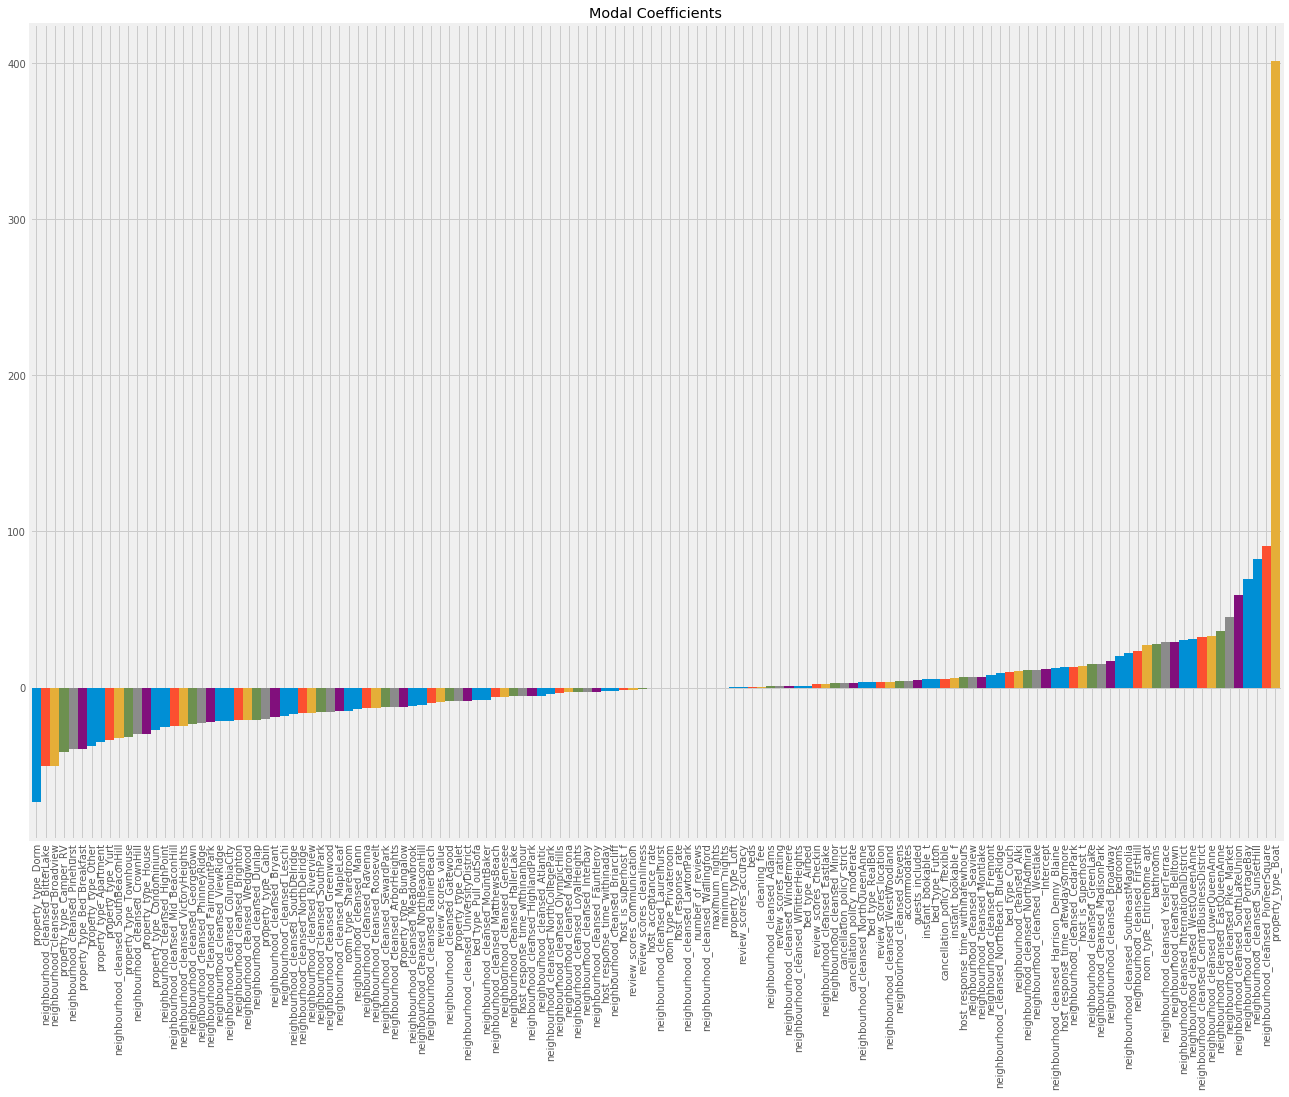

In [722]:
predictors = X.columns

coef = Series(fit.params,predictors).sort_values()

coef.plot(kind='bar',figsize=(20,15), title='Modal Coefficients', width=1)

In [723]:
degree = 1
est = make_pipeline(PolynomialFeatures(degree), RidgeCV())
est.fit(X_train, y_train)
# est.named_steps["est"]
ydata = est.named_steps.ridgecv.coef_

ypredict = est.predict(X_test)

print(mean_absolute_error(ypredict, y_test))
print(r2_score(ypredict, y_test))
print(est.named_steps.ridgecv)


32.51676529859355
0.3648024491012698
RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)


In [725]:
degree = 2
est = make_pipeline(PolynomialFeatures(degree), RidgeCV())
est.fit(X_train, y_train)
# est.named_steps["est"]
ydata = est.named_steps.ridgecv.coef_

ypredict = est.predict(X_test)

print(mean_absolute_error(ypredict, y_test))
print(r2_score(ypredict, y_test))
print(est.named_steps.ridgecv)

65.14882747266037
0.023792181506772203
RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)


In [726]:
#Getting even worse... don't need to run

# degree = 3
# est = make_pipeline(PolynomialFeatures(degree), RidgeCV())
# est.fit(X_train, y_train)
# # est.named_steps["est"]
# ydata = est.named_steps.ridgecv.coef_

# ypredict = est.predict(X_test)

# print(mean_absolute_error(ypredict, y_test))
# print(r2_score(ypredict, y_test))
# print(est.named_steps.ridgecv)

In [735]:
##### lesso


degree = 1
alpha = 1e-2
est = make_pipeline(PolynomialFeatures(degree), LassoCV(alphas=[1e-2]))
est.fit(X_train, y_train)


#ydata = est.named_steps.lassocv.coef_

ypredict = est.named_steps.lassocv.predict(X_test)

print(mean_absolute_error(ypredict, y_test))
print(r2_score(ypredict, y_test))
print(est.named_steps.lassocv)

ValueError: shapes (409,134) and (135,) not aligned: 134 (dim 1) != 135 (dim 0)

In [ ]:
est.named_steps

In [ ]:
plt.plot(X_train.T, ydata[0][1:]);
   
# plt.xticks(range(len(X_train)), X_train, rotation=45)
# plt.ylabel('Coefficients')
# # plt.style.use('fivethirtyeight')
# plt.show()


In [ ]:
listingdf_nn = listingdf.drop('neighbourhood_cleansed', axis = 1)
listingdf_nn = pd.get_dummies(listingdf_nn, columns=['instant_bookable', 'bed_type', 'room_type','property_type', 'host_is_superhost', 'host_response_time', 'cancellation_policy'])
listingdf_nn = listingdf_nn.reset_index(drop=True)

In [ ]:
X_nn = listingdf_nn.iloc[:,:-2]
y_nn = listingdf_nn.iloc[:,-1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#### WITHOUT NEIGHTBORHOOD 

#y, X = patsy.dmatrices('y_nn ~ host_response_rate + host_acceptance_rate + host_is_superhost_f + host_is_superhost_t + accommodates + bathrooms + bedrooms + beds + cleaning_fee + guests_included + minimum_nights + maximum_nights + number_of_reviews + review_scores_rating + review_scores_accuracy + review_scores_cleanliness + review_scores_checkin + review_scores_communication + review_scores_location + review_scores_value + instant_bookable_f + instant_bookable_t + bed_type_Airbed + bed_type_Couch + bed_type_Futon + bed_type_Pull_outSofa + bed_type_RealBed + room_type_Entirehome_apt + room_type_Privateroom + room_type_Sharedroom + property_type_Apartment + property_type_Bed_Breakfast + property_type_Boat + property_type_Bungalow + property_type_Cabin + property_type_Camper_RV + property_type_Chalet + property_type_Condominium + property_type_Dorm + property_type_House + property_type_Loft + property_type_Other + property_type_Townhouse + property_type_Yurt + host_response_time_afewdaysormore + host_response_time_withinaday + host_response_time_withinafewhours + host_response_time_withinanhour + cancellation_policy_flexible + cancellation_policy_moderate + cancellation_policy_strict', data=listingdf2, return_type="dataframe")


y, X = patsy.dmatrices('y_nn ~ X_nn', data=listingdf_nn, return_type="dataframe")

model = sm.OLS(y,X)
fit = model.fit()
fit.summary()

In [ ]:
predictors = X.columns

coef = Series(fit.params,predictors).sort_values()

coef.plot(kind='bar',figsize=(20,15), title='Modal Coefficients', width=1)

In [ ]:
X = listingdf2.iloc[:,:-2]
y = listingdf2.iloc[:,-1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV


fit_ridge = Ridge(fit_intercept=True).fit(X, y)

print(fit_ridge.coef_)
print(fit_ridge.intercept_)

In [ ]:
# def plot_approximation(est, ax, label=None):
#     """Plot the approximation of ``est`` on axis ``ax``. """
#     ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
#     ax.scatter(X, y, s=100)
#     ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red', label=label)
#     ax.set_ylim((-2, 2))
#     ax.set_xlim((0, 1))
#     ax.set_ylabel('y')
#     ax.set_xlabel('x')
#     ax.legend(loc='upper right',frameon=True)

degree = 2
est = make_pipeline(PolynomialFeatures(degree), RidgeCV())
ridgecoef = est.fit(X_train, y_train)
# est.named_steps["est"]
est.named_steps.ridgecv.coef_
#est.named_steps['ridgecv']


    
    #print(est.)
    #print(est.intercept_)

In [ ]:




ridge = Ridge(alpha=1e-6)
ridge_coef = ridge.fit(X, y).coef_

# plt.plot(range(len(X.columns)), ridge_coef)
fig, ax = plt.subplots(figsize=(40, 15), dpi = 100)
fig.suptitle('Ridge Coefficients', fontsize=20)


plt.plot(X.columns, ridge_coef.T)
   
plt.xticks(range(len(X.columns)), X.columns, rotation=45)
plt.ylabel('Coefficients')
# plt.style.use('fivethirtyeight')
plt.show()

    
    
    

In [ ]:
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=1e-6)
lasso_coef = lasso.fit(X, y).coef_

fig, ax = plt.subplots(figsize=(40, 15), dpi = 100)
fig.suptitle('Ridge Coefficients', fontsize=20)


plt.plot(range(len(X.columns)), lasso_coef)

plt.xticks(range(len(X.columns)), X.columns, rotation=45)
plt.ylabel('Coefficients')
plt.show()

In [ ]:
from sklearn.linear_model import ElasticNet

# Create only 2 plot rows, only trying 2 alphas
fig, ax_rows = plt.subplots(2, 2, figsize=(15, 10))

# Plot the results next to the coefficient values for each of hte 2 alphas
degree = 9
alphas = [1e-3, 1e-2]
for alpha, ax_row in zip(alphas, ax_rows):
    ax_left, ax_right = ax_row
    est = make_pipeline(PolynomialFeatures(degree), ElasticNet(alpha=alpha))
    est.fit(X_train, y_train)
    plot_approximation(est, ax_left, label='alpha=%r' % alpha)
    plot_coefficients(est, ax_right, label='ElasticNet(alpha=%r) coefficients' % alpha, yscale=None)

plt.tight_layout()

In [ ]:
from pandas import Series, DataFrame

lreg = LinearRegression()

lreg.fit(X_train,y_train)

lreg.summary

#checking the magnitude of coefficients

# predictors = X_train.columns

# coef = Series(lreg.coef_,predictors).sort_values()

# coef.plot(kind='bar', title='Modal Coefficients')



In [ ]:
# from sklearn.metrics import mean_squared_error
# from sklearn.linear_model import Ridge

# def plot_coefficients(est, ax, label=None, yscale='log'):
#     coef = est.steps[-1][1].coef_.ravel()
#     if yscale == 'log':
#         ax.semilogy(np.abs(coef), marker='o', label=label)
#         ax.set_ylim((1e-1, 1e8))
#     else:
#         ax.plot(np.abs(coef), marker='o', label=label)
#     ax.set_ylabel('abs(coefficient)')
#     ax.set_xlabel('coefficients')
#     ax.set_xlim((1, 9))
    
# degree = 2
# alphas = [0.0, 1e-8, 1e-5, 1e-1]
# for alpha, ax_row in zip(alphas, ax_rows):
#     ax_left, ax_right = ax_row
#     est = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
#     est.fit(X_train, y_train)
#     plot_approximation(est, ax_left, label='alpha=%r' % alpha)
#     plot_coefficients(est, ax_right, label='Ridge(alpha=%r) coefficients' % alpha)

# plt.tight_layout()

In [ ]:
fit.resid.plot(style='o', figsize=(12,8));

In [ ]:
# p = model.fit().params
# x = np.arange(1, 3)
# ax = df.plot(x='host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'cleaning_fee', 'guests_included', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'cancellation_policy'
#             , y='price', kind='scatter')


# # X = np.array(['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'cleaning_fee', 'guests_included', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'cancellation_policy'])
# # y = np.array(['price'])

# # sns.regplot(x = X , y = y , data=listingdf)

In [ ]:
#X = listingdf['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'cleaning_fee', 'guests_included', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'cancellation_policy']


In [ ]:


fig, ax = plt.subplots(figsize=(8,6))
ax.plot(X, y, 'o', label="Data")


#ax.plot(X, y, 'b-', label="True")
#ax.plot(X, fit.fittedvalues, 'r--.', label="Predicted")
# ax.plot(X, iv_u, 'r--')
# ax.plot(X, iv_l, 'r--')
#legend = ax.legend(loc="best")

In [ ]:
#Relationship between "accommodates", "bathrooms", "bedrooms", "beds" vs "price"

sns.pairplot(listingdf, x_vars=["accommodates", "bathrooms", "bedrooms", "beds"], y_vars=["price"],
             size=5, aspect=.8, kind="reg");


In [ ]:
#Relationship between "host_response_rate","host_acceptance_rate" vs "price"

sns.pairplot(listingdf, x_vars=["host_response_rate","host_acceptance_rate"], y_vars=["price"],
             size=5, aspect=.8, kind="reg");

In [ ]:
#Relationship between "host_response_rate","host_acceptance_rate" vs "price"

sns.pairplot(listingdf, x_vars=["cancellation_policy"], y_vars=["price"],
             size=5, aspect=.8, kind="reg");

In [ ]:
# $range between "property_type" -> may need to analysis diff property type separately?


sns.pairplot(listingdf, x_vars=["property_type"], y_vars=["price"],
             size=15, aspect=0.8, kind="reg");

In [ ]:
sns.countplot(x="property_type", data=listingdf, palette="Greens_d");


In [ ]:

lm1 = smf.ols('price ~ host_response_time + host_response_rate + host_acceptance_rate + host_is_superhost + neighbourhood_cleansed + property_type + room_type + accommodates + bathrooms + bedrooms + beds + bed_type + cleaning_fee + guests_included + minimum_nights + maximum_nights + number_of_reviews + review_scores_rating + review_scores_accuracy + review_scores_cleanliness + review_scores_checkin + review_scores_communication + review_scores_location + review_scores_value + instant_bookable + cancellation_policy', data=listingdf)

fit2 = lm1.fit()
fit2.summary()

In [ ]:
fig, ax = plt.subplots(figsize=(12))
fig = sm.graphics.plot_partregress('price', 'accommodates' , ['accommodates','proprty'], data=fit, ax=ax)


In [ ]:
#sns.set(style="whitegrid", palette="muted")

#data = pd.melt(listingdf2, "species", var_name="measurement")
#sns.swarmplot(x="accommodates", y="price", hue="columns", data=listingdf2)

plt.subplots(figsize=(15,10))
sns.swarmplot(x=listingdf['property_type'], y=listingdf['price'], data=listingdf)


In [ ]:
#'f_price ~ ' +' + '.join(X.columns)
#y, X = patsy.dmatrices('f_price ~ ' +' + '.join(X.columns))
#X = listingdf2[:[]'host_response_rate', 'host_acceptance_rate', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'cleaning_fee', 'guests_included', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable_f', 'instant_bookable_t', 'bed_type_Airbed', 'bed_type_Couch', 'bed_type_Futon', 'bed_type_Pull_outSofa', 'bed_type_RealBed', 'room_type_Entirehome_apt', 'room_type_Privateroom', 'room_type_Sharedroom', 'property_type_Apartment', 'property_type_Bed_Breakfast', 'property_type_Boat', 'property_type_Bungalow', 'property_type_Cabin', 'property_type_Camper_RV', 'property_type_Chalet', 'property_type_Condominium', 'property_type_Dorm', 'property_type_House', 'property_type_Loft', 'property_type_Other', 'property_type_Townhouse', 'property_type_Yurt', 'neighbourhood_cleansed_Adams', 'neighbourhood_cleansed_Alki', 'neighbourhood_cleansed_ArborHeights', 'neighbourhood_cleansed_Atlantic', 'neighbourhood_cleansed_Belltown', 'neighbourhood_cleansed_BitterLake', 'neighbourhood_cleansed_Briarcliff', 'neighbourhood_cleansed_Brighton', 'neighbourhood_cleansed_Broadview', 'neighbourhood_cleansed_Broadway', 'neighbourhood_cleansed_Bryant', 'neighbourhood_cleansed_CedarPark', 'neighbourhood_cleansed_CentralBusinessDistrict', 'neighbourhood_cleansed_ColumbiaCity', 'neighbourhood_cleansed_CrownHill', 'neighbourhood_cleansed_Dunlap', 'neighbourhood_cleansed_EastQueenAnne', 'neighbourhood_cleansed_Eastlake', 'neighbourhood_cleansed_FairmountPark', 'neighbourhood_cleansed_Fauntleroy', 'neighbourhood_cleansed_FirstHill', 'neighbourhood_cleansed_Fremont', 'neighbourhood_cleansed_Gatewood', 'neighbourhood_cleansed_Genesee', 'neighbourhood_cleansed_Georgetown', 'neighbourhood_cleansed_GreenLake', 'neighbourhood_cleansed_Greenwood', 'neighbourhood_cleansed_HallerLake', 'neighbourhood_cleansed_Harrison_Denny_Blaine', 'neighbourhood_cleansed_HighPoint', 'neighbourhood_cleansed_HighlandPark', 'neighbourhood_cleansed_Interbay', 'neighbourhood_cleansed_InternationalDistrict', 'neighbourhood_cleansed_Laurelhurst', 'neighbourhood_cleansed_LawtonPark', 'neighbourhood_cleansed_Leschi', 'neighbourhood_cleansed_LowerQueenAnne', 'neighbourhood_cleansed_LoyalHeights', 'neighbourhood_cleansed_MadisonPark', 'neighbourhood_cleansed_Madrona', 'neighbourhood_cleansed_Mann', 'neighbourhood_cleansed_MapleLeaf', 'neighbourhood_cleansed_MatthewsBeach', 'neighbourhood_cleansed_Meadowbrook', 'neighbourhood_cleansed_Mid_BeaconHill', 'neighbourhood_cleansed_Minor', 'neighbourhood_cleansed_Montlake', 'neighbourhood_cleansed_MountBaker', 'neighbourhood_cleansed_NorthAdmiral', 'neighbourhood_cleansed_NorthBeach_BlueRidge', 'neighbourhood_cleansed_NorthBeaconHill', 'neighbourhood_cleansed_NorthCollegePark', 'neighbourhood_cleansed_NorthDelridge', 'neighbourhood_cleansed_NorthQueenAnne', 'neighbourhood_cleansed_OlympicHills', 'neighbourhood_cleansed_PhinneyRidge', 'neighbourhood_cleansed_Pike_Market', 'neighbourhood_cleansed_Pinehurst', 'neighbourhood_cleansed_PioneerSquare', 'neighbourhood_cleansed_PortageBay', 'neighbourhood_cleansed_RainierBeach', 'neighbourhood_cleansed_Ravenna', 'neighbourhood_cleansed_Riverview', 'neighbourhood_cleansed_Roosevelt', 'neighbourhood_cleansed_Seaview', 'neighbourhood_cleansed_SewardPark', 'neighbourhood_cleansed_SouthBeaconHill', 'neighbourhood_cleansed_SouthDelridge', 'neighbourhood_cleansed_SouthLakeUnion', 'neighbourhood_cleansed_SouthPark', 'neighbourhood_cleansed_SoutheastMagnolia', 'neighbourhood_cleansed_Stevens', 'neighbourhood_cleansed_SunsetHill', 'neighbourhood_cleansed_UniversityDistrict', 'neighbourhood_cleansed_VictoryHeights', 'neighbourhood_cleansed_ViewRidge', 'neighbourhood_cleansed_Wallingford', 'neighbourhood_cleansed_Wedgwood', 'neighbourhood_cleansed_WestQueenAnne', 'neighbourhood_cleansed_WestWoodland', 'neighbourhood_cleansed_Westlake', 'neighbourhood_cleansed_WhittierHeights', 'neighbourhood_cleansed_Windermere', 'neighbourhood_cleansed_YeslerTerrace', 'host_is_superhost_f', 'host_is_superhost_t', 'neighbourhood_cleansed_Adams', 'neighbourhood_cleansed_Alki', 'neighbourhood_cleansed_ArborHeights', 'neighbourhood_cleansed_Atlantic', 'neighbourhood_cleansed_Belltown', 'neighbourhood_cleansed_BitterLake', 'neighbourhood_cleansed_Briarcliff', 'neighbourhood_cleansed_Brighton', 'neighbourhood_cleansed_Broadview', 'neighbourhood_cleansed_Broadway', 'neighbourhood_cleansed_Bryant', 'neighbourhood_cleansed_CedarPark', 'neighbourhood_cleansed_CentralBusinessDistrict', 'neighbourhood_cleansed_ColumbiaCity', 'neighbourhood_cleansed_CrownHill', 'neighbourhood_cleansed_Dunlap', 'neighbourhood_cleansed_EastQueenAnne', 'neighbourhood_cleansed_Eastlake', 'neighbourhood_cleansed_FairmountPark', 'neighbourhood_cleansed_Fauntleroy', 'neighbourhood_cleansed_FirstHill', 'neighbourhood_cleansed_Fremont', 'neighbourhood_cleansed_Gatewood', 'neighbourhood_cleansed_Genesee', 'neighbourhood_cleansed_Georgetown', 'neighbourhood_cleansed_GreenLake', 'neighbourhood_cleansed_Greenwood', 'neighbourhood_cleansed_HallerLake', 'neighbourhood_cleansed_Harrison_Denny_Blaine', 'neighbourhood_cleansed_HighPoint', 'neighbourhood_cleansed_HighlandPark', 'neighbourhood_cleansed_Interbay', 'neighbourhood_cleansed_InternationalDistrict', 'neighbourhood_cleansed_Laurelhurst', 'neighbourhood_cleansed_LawtonPark', 'neighbourhood_cleansed_Leschi', 'neighbourhood_cleansed_LowerQueenAnne', 'neighbourhood_cleansed_LoyalHeights', 'neighbourhood_cleansed_MadisonPark', 'neighbourhood_cleansed_Madrona', 'neighbourhood_cleansed_Mann', 'neighbourhood_cleansed_MapleLeaf', 'neighbourhood_cleansed_MatthewsBeach', 'neighbourhood_cleansed_Meadowbrook', 'neighbourhood_cleansed_Mid_BeaconHill', 'neighbourhood_cleansed_Minor', 'neighbourhood_cleansed_Montlake', 'neighbourhood_cleansed_MountBaker', 'neighbourhood_cleansed_NorthAdmiral', 'neighbourhood_cleansed_NorthBeach_BlueRidge', 'neighbourhood_cleansed_NorthBeaconHill', 'neighbourhood_cleansed_NorthCollegePark', 'neighbourhood_cleansed_NorthDelridge', 'neighbourhood_cleansed_NorthQueenAnne', 'neighbourhood_cleansed_OlympicHills', 'neighbourhood_cleansed_PhinneyRidge', 'neighbourhood_cleansed_Pike_Market', 'neighbourhood_cleansed_Pinehurst', 'neighbourhood_cleansed_PioneerSquare', 'neighbourhood_cleansed_PortageBay', 'neighbourhood_cleansed_RainierBeach', 'neighbourhood_cleansed_Ravenna', 'neighbourhood_cleansed_Riverview', 'neighbourhood_cleansed_Roosevelt', 'neighbourhood_cleansed_Seaview', 'neighbourhood_cleansed_SewardPark', 'neighbourhood_cleansed_SouthBeaconHill', 'neighbourhood_cleansed_SouthDelridge', 'neighbourhood_cleansed_SouthLakeUnion', 'neighbourhood_cleansed_SouthPark', 'neighbourhood_cleansed_SoutheastMagnolia', 'neighbourhood_cleansed_Stevens', 'neighbourhood_cleansed_SunsetHill', 'neighbourhood_cleansed_UniversityDistrict', 'neighbourhood_cleansed_VictoryHeights', 'neighbourhood_cleansed_ViewRidge', 'neighbourhood_cleansed_Wallingford', 'neighbourhood_cleansed_Wedgwood', 'neighbourhood_cleansed_WestQueenAnne', 'neighbourhood_cleansed_WestWoodland', 'neighbourhood_cleansed_Westlake', 'neighbourhood_cleansed_WhittierHeights', 'neighbourhood_cleansed_Windermere', 'neighbourhood_cleansed_YeslerTerrace', 'host_response_time_afewdaysormore', 'host_response_time_withinaday', 'host_response_time_withinafewhours', 'host_response_time_withinanhour', 'cancellation_policy_flexible', 'cancellation_policy_moderate', 'cancellation_policy_strict']


# def f(x):
#     return Y

# def plot_approximation(est, ax, label=None):
#     """Plot the approximation of ``est`` on axis ``ax``. """
#     ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
#     ax.scatter(X, y, s=100)
#     ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red', label=label)
#     ax.set_ylim((-2, 2))
#     ax.set_xlim((0, 1))
#     ax.set_ylabel('y')
#     ax.set_xlabel('x')
#     ax.legend(loc='upper right',frameon=True)

# x_plot = np.linspace(0, 1, 100)